In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# THE ILINET DATA ANALYSIS

In [85]:
data = 'datasets/all_surveillance_data/ILINet.csv'
full_data = pd.read_csv(data, skiprows=1, index_col=False)

In [110]:
full_data.columns

Index(['REGION TYPE', 'REGION', 'YEAR', 'WEEK', '% WEIGHTED ILI',
       '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS',
       'TOTAL PATIENTS'],
      dtype='object')

In [335]:
full_data_2 = full_data.drop(['AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', '% WEIGHTED ILI', 'REGION TYPE', 'ILITOTAL', 'NUM. OF PROVIDERS', '%UNWEIGHTED ILI'], axis=1)
# mod_data = full_data_2.assign(TIME=(full_data_2.YEAR - 2010) * 52 + full_data_2.WEEK - 40)

In [337]:
full_data_2
to_write = full_data_2[np.logical_not(full_data_2['TOTAL PATIENTS'] == 'X')]

In [338]:
to_write.head()

,REGION,YEAR,WEEK,TOTAL PATIENTS
0,Alabama,2010,40,11664
1,Alaska,2010,40,1714
2,Arizona,2010,40,25492
3,Arkansas,2010,40,2586
4,California,2010,40,32342


In [340]:
#np.savetxt('for_udit.txt', to_write, fmt='%s, %s, %s, %s', )
to_write.to_csv()

In [181]:
mod_data['TOTAL PATIENTS'].astype(str).astype(int)
mod_data.info()

ValueError: invalid literal for int() with base 10: 'X'

In [126]:
#Breaks down by State
calif = mod_data[mod_data['REGION'] == 'California']
calif.sort_values(by=['TIME']).head()

,REGION,YEAR,WEEK,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,TIME
4,California,2010,40,1.95412,632,112,32342,0
56,California,2010,41,2.15266,742,122,34469,1
108,California,2010,42,2.24173,766,126,34170,2
160,California,2010,43,1.91748,666,130,34733,3
212,California,2010,44,2.52326,887,131,35153,4


In [128]:
def moving_average(data_set, periods=3):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

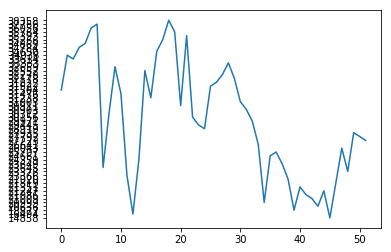

In [186]:
plt.plot(calif['TOTAL PATIENTS'][52:104].values)
plt.show() 

In [191]:
data_2011 = mod_data[mod_data['YEAR'] == 2011]

# NOW DIFFERENT DATA

In [319]:
data2 = 'datasets/all_surveillance_data/WHO_NREVSS_Clinical_Labs.csv'
full_data_2 = pd.read_csv(data2, skiprows=1, index_col=False)
full_data_2

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,States,Alabama,2015,40,167,2,3,2.99,1.2,1.8
1,States,Alaska,2015,40,X,X,X,X,X,X
2,States,Arizona,2015,40,55,0,0,0,0,0
3,States,Arkansas,2015,40,26,0,1,3.85,0,3.85
4,States,California,2015,40,683,2,0,0.29,0.29,0
5,States,Colorado,2015,40,255,0,1,0.39,0,0.39
6,States,Connecticut,2015,40,304,1,0,0.33,0.33,0
7,States,Delaware,2015,40,22,0,0,0,0,0
8,States,District of Columbia,2015,40,X,X,X,X,X,X
9,States,Florida,2015,40,X,X,X,X,X,X


In [320]:
# 2011 data

In [321]:
mod_data

,REGION,YEAR,WEEK,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,TIME
0,Alabama,2010,40,2.13477,249,35,11664,0
1,Alaska,2010,40,0.875146,15,7,1714,0
2,Arizona,2010,40,0.674721,172,49,25492,0
3,Arkansas,2010,40,0.696056,18,15,2586,0
4,California,2010,40,1.95412,632,112,32342,0
5,Colorado,2010,40,0.660684,134,14,20282,0
6,Connecticut,2010,40,0.0783085,3,12,3831,0
7,Delaware,2010,40,0.100125,4,13,3995,0
8,District of Columbia,2010,40,2.80877,73,4,2599,0
9,Florida,2010,40,X,X,X,X,0


In [225]:
data_intermediate = mod_data[mod_data['YEAR'] == 2011]

In [227]:
data_2011 = data_intermediate[np.logical_not(data_intermediate['TOTAL PATIENTS'] == 'X')]

In [232]:
data_2011['TOTAL PATIENTS'] = data_2011['TOTAL PATIENTS'].astype(int)

/Users/kaushiksrini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
data_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 676 to 3392
Data columns (total 8 columns):
REGION               2665 non-null object
YEAR                 2665 non-null int64
WEEK                 2665 non-null int64
%UNWEIGHTED ILI      2665 non-null object
ILITOTAL             2665 non-null object
NUM. OF PROVIDERS    2665 non-null object
TOTAL PATIENTS       2665 non-null int64
TIME                 2665 non-null int64
dtypes: int64(4), object(4)
memory usage: 267.4+ KB


In [266]:
i = 1
month1_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [267]:
i = 2
month2_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [268]:
i = 3
month3_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [269]:
i = 4
month4_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [270]:
i = 5
month5_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [271]:
i = 6
month6_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [272]:
i = 7
month7_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [273]:
i = 8
month8_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [274]:
i = 9
month9_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [275]:
i = 10
month10_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [276]:
i = 11
month11_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [277]:
i = 12
month12_2011 = data_2011[np.logical_and(data_2011['WEEK'] >= (4 * i - 3), data_2011['WEEK'] <= (4 * i))].groupby(['REGION']).sum().drop(['YEAR', 'WEEK', 'TIME'], axis=1).assign(MONTH=i)

In [280]:
frames = [month1_2011, month2_2011, month3_2011, month4_2011, month5_2011, month6_2011, month7_2011, month8_2011, month9_2011, month10_2011, month11_2011, month12_2011]

In [293]:
result = pd.concat(frames)

In [294]:
result.reset_index(level=0, inplace=True)

In [295]:
result

,REGION,TOTAL PATIENTS,MONTH
0,Alabama,47777,1
1,Alaska,8427,1
2,Arizona,109531,1
3,Arkansas,15638,1
4,California,140374,1
5,Colorado,83748,1
6,Connecticut,13136,1
7,Delaware,16229,1
8,District of Columbia,11405,1
9,Georgia,137176,1


In [298]:
np.savetxt('health_data.txt', result, fmt="%s, %d, %d") 

In [317]:
utah_temp = result[result['REGION'] == 'Mass']

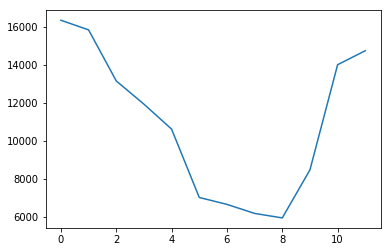

In [318]:
plt.plot(utah_temp['TOTAL PATIENTS'].values)
plt.show()